# BIG DATA ANALYTICS WITH <font color='green'>PYSPARK</font>

## <font color='blue'>Pandas</font>

In [1]:
import pandas as pd
import time

In [2]:
# Define the file path
file_path = '/Users/hipprofessional/Downloads/Amazon products dataset.csv'

In [3]:
df = pd.read_csv(file_path)

#### <font color='blue'>Reading in the csv file using pd.read_csv doesn't work. My computer couldn't handle the massive dataset</font>

In [4]:
# Start the timer
start_time = time.time()

df = pd.read_csv(file_path)

# End the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Print the first few rows of the DataFrame
print(df.head(5))

# Print the execution time
print("Execution Time using chunks:", execution_time, "seconds")

    timestamp        asin       brand  buybox_seller final_price  \
0  2022-10-03  B07W5RF3HH  Kensington            NaN      $29.49   
1  2023-09-10  B0C5J3P4FP     Jzyliti        Chumgap        9.99   
2  2023-09-10  B0BC3Y5LDP    Tamispit  Sienfix_Store       29.99   
3  2023-09-10  B0C8SGDRX5      DYEYOY     DYEYOY USA       29.99   
4  2023-08-22  B08F6T1CJ7          HP     Amazon.com         699   

   number_of_sellers  root_bs_rank  reviews_count currency  \
0               19.0          80.0            114        $   
1                1.0        1231.0            210      USD   
2                2.0        2132.0           2087      USD   
3                1.0        4431.0           1319      USD   
4                5.0        9118.0            487      USD   

                                           image_url  ...  video  \
0  https://m.media-amazon.com/images/I/41HY8rhd7T...  ...   True   
1  https://m.media-amazon.com/images/I/519kCtmSNM...  ...  False   
2  https://m.m

#### <font color='blue'>Reading in the csv file using chunks also doesn't work. My computer still could not handle the massive dataset</font>

In [5]:
# Define the chunk size
chunk_size = 10000

# Initialize an empty list to store the chunks
chunks = []

# Start the timer
start_time = time.time()

# Iterate through the CSV file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate the chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)

# End the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Print the first few rows of the DataFrame
print(df.head(5))

# Print the execution time
print("Execution Time using chunks:", execution_time, "seconds")

    timestamp        asin       brand  buybox_seller final_price  \
0  2022-10-03  B07W5RF3HH  Kensington            NaN      $29.49   
1  2023-09-10  B0C5J3P4FP     Jzyliti        Chumgap        9.99   
2  2023-09-10  B0BC3Y5LDP    Tamispit  Sienfix_Store       29.99   
3  2023-09-10  B0C8SGDRX5      DYEYOY     DYEYOY USA       29.99   
4  2023-08-22  B08F6T1CJ7          HP     Amazon.com         699   

   number_of_sellers  root_bs_rank  reviews_count currency  \
0               19.0          80.0            114        $   
1                1.0        1231.0            210      USD   
2                2.0        2132.0           2087      USD   
3                1.0        4431.0           1319      USD   
4                5.0        9118.0            487      USD   

                                           image_url  ...  video  \
0  https://m.media-amazon.com/images/I/41HY8rhd7T...  ...   True   
1  https://m.media-amazon.com/images/I/519kCtmSNM...  ...  False   
2  https://m.m

## <font color='green'>Spark</font>

In [6]:
# Importing the necessary libraries
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, DateType
from pyspark.sql.functions import col, sum, countDistinct, count, regexp_replace, split, month, year, size, element_at, struct, trim, avg, expr, lit
from pyspark.sql import functions as F
from pyspark.sql.window import Window

In [7]:
# Create SparkSession
spark = SparkSession.builder \
    .appName("AmazonElectronics") \
    .getOrCreate()

23/09/23 22:47:04 WARN Utils: Your hostname, Karans-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.22.24.18 instead (on interface en5)
23/09/23 22:47:04 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/23 22:47:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/09/23 22:47:04 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [8]:
# Define the schema
schema = StructType([
    StructField("timestamp", DateType(), True),
    StructField("asin", StringType(), True),
    StructField("brand", StringType(), True),
    StructField("buybox_seller", StringType(), True),
    StructField("final_price", StringType(), True),
    StructField("number_of_sellers", IntegerType(), True),
    StructField("root_bs_rank", IntegerType(), True),
    StructField("reviews_count", IntegerType(), True),
    StructField("ISBN10", StringType(), True),
    StructField("currency", StringType(), True),
    StructField("image_url", StringType(), True),
    StructField("images_count", IntegerType(), True),
    StructField("title", StringType(), True),
    StructField("url", StringType(), True),
    StructField("video_count", IntegerType(), True),
    StructField("category_tree", StringType(), True),
    StructField("item_weight", StringType(), True),
    StructField("rating", DoubleType(), True),
    StructField("top_review", StringType(), True),
    StructField("seller_id", StringType(), True),
    StructField("availability", StringType(), True),
    StructField("product_dimensions", StringType(), True),
    StructField("discount", StringType(), True),
    StructField("initial_price", StringType(), True),
    StructField("description", StringType(), True),
    StructField("image", StringType(), True),
    StructField("answered_questions", IntegerType(), True),
    StructField("date_first_available", StringType(), True),
    StructField("model_number", StringType(), True),
    StructField("manufacturer", StringType(), True),
    StructField("department", StringType(), True),
    StructField("plus_content", StringType(), True),
    StructField("upc", StringType(), True),
    StructField("video", StringType(), True),
])

In [9]:
# Define the file path
file_path = '/Users/hipprofessional/Downloads/Amazon products dataset.csv'

# Start the timer
start_time = time.time()

# Read the CSV file into a DataFrame
df = spark.read.csv(file_path, schema=schema, header=True, quote='"', escape='"')

# End the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Get the number of rows
num_rows = df.count()

# Get the number of columns
num_columns = len(df.columns)

# Display the shape
print("Shape: {} rows and {} columns".format(num_rows, num_columns))

# Print the execution time
print("Execution Time using PySpark:", execution_time, "seconds")

Shape: 1004 rows and 34 columns
Execution Time using PySpark: 1.5912888050079346 seconds


### <font color='green'>Some basic operations</font>

#### <font color='green'>Let's check out our data!</font>

In [10]:
# Displaying a maximum of 34 columns so that we can scroll through our entire dataset horizontally
pd.options.display.max_columns = 34

In [11]:
# Checking out the first 3 rows of the dataframe
df.limit(6).toPandas()

23/09/23 22:47:08 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/09/23 22:47:08 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 42, schema size: 34
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


,timestamp,asin,brand,buybox_seller,final_price,number_of_sellers,root_bs_rank,reviews_count,ISBN10,currency,image_url,images_count,title,url,video_count,category_tree,item_weight,rating,top_review,seller_id,availability,product_dimensions,discount,initial_price,description,image,answered_questions,date_first_available,model_number,manufacturer,department,plus_content,upc,video
0,2022-10-03,B07W5RF3HH,Kensington,null,$29.49,19,80,114,$,https://m.media-amazon.com/images/I/41HY8rhd7T...,5,NaN,https://www.amazon.com/dp/B07W5RF3HH?language=...,1,NaN,‎4.8 ounces,4.1,NaN,ATVPDKIKX0DER,In Stock.,‎2.5 x 8 x 6.5 inches,null,null,Trust the industry standard to protect your la...,https://m.media-amazon.com/images/I/41HY8rhd7T...,10,NaN,‎K64671AM,‎Kensington,‎Computers and Portables,true,null,true,null
1,2023-09-10,B0C5J3P4FP,Jzyliti,Chumgap,9.99,1,1231,210,USD,https://m.media-amazon.com/images/I/519kCtmSNM...,1,NaN,https://www.amazon.com/Electricity-Saving-Hous...,0,NaN,6.1 ounces,3.7,NaN,A1M00XH600DFT1,In Stock,5.55 x 2.8 x 2.6 inches,-17%,12,About this item Energy saving: The function of...,https://m.media-amazon.com/images/I/519kCtmSNM...,0,NaN,null,Jzyliti,null,true,null,false,Chumgap
2,2023-09-10,B0BC3Y5LDP,Tamispit,Sienfix_Store,29.99,2,2132,2087,USD,https://m.media-amazon.com/images/I/61SPoXa5gt...,1,NaN,https://www.amazon.com/tamispit-Swimming-Water...,0,NaN,2.39 ounces,4,NaN,A3OJDUALT76EMY,In Stock,5.5 x 0.5 x 3.5 inches,-40%,49.99,About this item 【Multi-Function Smart Watch】: ...,https://m.media-amazon.com/images/I/61SPoXa5gt...,0,NaN,null,tamispit,Unisex Adult,false,null,false,Sienfix_Store
3,2023-09-10,B0C8SGDRX5,DYEYOY,DYEYOY USA,29.99,1,4431,1319,USD,https://m.media-amazon.com/images/I/71pRaqeCNJ...,1,NaN,https://www.amazon.com/Cartridges-Compatible-R...,0,NaN,6.4 ounces,4.4,NaN,A20EBBGLBGFXAW,In Stock,4.53 x 3.15 x 2.28 inches,$6.00 (17%),35.99,About this item 🖨️Compatible Printer: OfficeJe...,https://m.media-amazon.com/images/I/71pRaqeCNJ...,0,NaN,951,DYEYOY,null,false,null,false,DYEYOY USA
4,2023-08-22,B08F6T1CJ7,HP,Amazon.com,699,5,9118,487,USD,https://m.media-amazon.com/images/I/81sJcFP6mA...,1,NaN,https://www.amazon.com/HP-DesignJet-Compact-Wi...,0,NaN,47 pounds,4.4,NaN,ATVPDKIKX0DER,In Stock,11 x 40 x 17 inches,-13%,699,"IDEAL FOR: Technical line-drawings, renders re...",https://m.media-amazon.com/images/I/81sJcFP6mA...,0,NaN,8AG32A#B1K,HP DesignJet,null,false,null,false,Amazon.com
5,2023-09-10,B07Z6CSMKM,GEEKRIA,GeekriaDirect,15.95,4,100655,60,USD,https://m.media-amazon.com/images/I/71qeeQjVWk...,1,NaN,https://www.amazon.com/UltraShell-Cancelling-H...,0,NaN,5.6 ounces,4.4,NaN,A2OPUAQVSPCTA3,Only 9 left in stock - order soon,6.69 x 5.91 x 3.74 inches,-10%,17.75,Product Features Maximum compatible headphone ...,https://m.media-amazon.com/images/I/71qeeQjVWk...,0,NaN,EJB108-01,GEEKRIA,null,false,null,false,GeekriaDirect


In [12]:
df.limit(6).collect()

23/09/23 22:47:08 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 42, schema size: 34
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


[Row(timestamp=datetime.date(2022, 10, 3), asin='B07W5RF3HH', brand='Kensington', buybox_seller='null', final_price='$29.49', number_of_sellers=19, root_bs_rank=80, reviews_count=114, ISBN10='$', currency='https://m.media-amazon.com/images/I/41HY8rhd7TL.__AC_SX300_SY300_QL70_FMwebp_.jpg', image_url='5', images_count=None, title='https://www.amazon.com/dp/B07W5RF3HH?language=en_US&currency=USD', url='1', video_count=None, category_tree='\u200e4.8 ounces', item_weight='4.1', rating=None, top_review='ATVPDKIKX0DER', seller_id='In Stock.', availability='\u200e2.5 x 8 x 6.5 inches', product_dimensions='null', discount='null', initial_price='Trust the industry standard to protect your laptop and the private information that’s on it. The Kensington Portable Combination Laptop Lock offers one-handed engagement, as T-Bar locking technology easily attaches to the Kensington Security Slot found on most laptops. The 4-wheel number code can be set to any of 10,000 possible combinations and is reset

In [13]:
# Selecting specific columns only
df.select('brand', 'title', 'images_count', 'video_count').limit(5).toPandas()

23/09/23 22:47:08 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: brand, title, url, categories
 Schema: brand, images_count, title, video_count
Expected: images_count but found: title
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


,brand,title,images_count,video_count
0,Kensington,https://www.amazon.com/dp/B07W5RF3HH?language=...,NaN,NaN
1,Jzyliti,https://www.amazon.com/Electricity-Saving-Hous...,NaN,NaN
2,Tamispit,https://www.amazon.com/tamispit-Swimming-Water...,NaN,NaN
3,DYEYOY,https://www.amazon.com/Cartridges-Compatible-R...,NaN,NaN
4,HP,https://www.amazon.com/HP-DesignJet-Compact-Wi...,NaN,NaN


In [14]:
# Checking that the asin (Amazon Standard Identification Number) is unique
# The collect() method returns a list of rows, [0] is used to access the first row in the list, 
# and [0] again is used to access the first element (the count of distinct values) in that row.
df.agg(countDistinct("asin")).collect()[0][0]

1002

In [15]:
# Or you can group by the 'asin' column, count the values for each asin and then count the rows for the entire dataframe
(df.groupby('asin').count()).count()

CodeCache: size=131072Kb used=22429Kb max_used=22443Kb free=108642Kb
 bounds [0x000000010a9d8000, 0x000000010bff8000, 0x00000001129d8000]
 total_blobs=9052 nmethods=8110 adapters=855
 compilation: disabled (not enough contiguous free space left)


Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


1003

In [16]:
# Filtering the dataframe for a specific brand
df.filter(col('brand') == 'Hitachi').limit(3).toPandas()

23/09/23 22:47:09 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 42, schema size: 34
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


,timestamp,asin,brand,buybox_seller,final_price,number_of_sellers,root_bs_rank,reviews_count,ISBN10,currency,image_url,images_count,title,url,video_count,category_tree,item_weight,rating,top_review,seller_id,availability,product_dimensions,discount,initial_price,description,image,answered_questions,date_first_available,model_number,manufacturer,department,plus_content,upc,video


In [17]:
# Filtering the dataframe for products with more than 5 images
df.filter(col('images_count') > 5).select('asin','images_count').limit(5).toPandas()

23/09/23 22:47:09 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: asin, title
 Schema: asin, images_count
Expected: images_count but found: title
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


,asin,images_count


In [18]:
df.filter((col('images_count') > 5) & (col('video_count') > 5)).select('asin', 'brand', 'title', 'images_count', 'video_count').limit(5).toPandas()

23/09/23 22:47:10 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: asin, brand, title, url, categories
 Schema: asin, brand, images_count, title, video_count
Expected: images_count but found: title
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


,asin,brand,title,images_count,video_count


#### <font color='green'>Keeping only the columns of interest</font>

In [19]:
cols = ['timestamp', 'asin', 'brand', 'final_price', 'reviews_count', 'images_count', 'title', 'url',
       'video_count', 'rating', 'category_tree']

In [20]:
df = df.select(cols)

In [21]:
df.limit(6).toPandas()

23/09/23 22:47:10 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: timestamp, asin, brand, final_price, reviews_count, title, url, video_count, categories, item_weight, top_review
 Schema: timestamp, asin, brand, final_price, reviews_count, images_count, title, url, video_count, category_tree, rating
Expected: images_count but found: title
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


,timestamp,asin,brand,final_price,reviews_count,images_count,title,url,video_count,rating,category_tree
0,2022-10-03,B07W5RF3HH,Kensington,$29.49,114,NaN,https://www.amazon.com/dp/B07W5RF3HH?language=...,1,NaN,NaN,‎4.8 ounces
1,2023-09-10,B0C5J3P4FP,Jzyliti,9.99,210,NaN,https://www.amazon.com/Electricity-Saving-Hous...,0,NaN,NaN,6.1 ounces
2,2023-09-10,B0BC3Y5LDP,Tamispit,29.99,2087,NaN,https://www.amazon.com/tamispit-Swimming-Water...,0,NaN,NaN,2.39 ounces
3,2023-09-10,B0C8SGDRX5,DYEYOY,29.99,1319,NaN,https://www.amazon.com/Cartridges-Compatible-R...,0,NaN,NaN,6.4 ounces
4,2023-08-22,B08F6T1CJ7,HP,699,487,NaN,https://www.amazon.com/HP-DesignJet-Compact-Wi...,0,NaN,NaN,47 pounds
5,2023-09-10,B07Z6CSMKM,GEEKRIA,15.95,60,NaN,https://www.amazon.com/UltraShell-Cancelling-H...,0,NaN,NaN,5.6 ounces


#### <font color='green'>How many null values do we have in the dataframe?</font>

In [22]:
null_counts = df.select([sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])

# Display the null counts
null_counts.toPandas()

23/09/23 22:47:10 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: timestamp, asin, brand, final_price, reviews_count, title, url, video_count, categories, item_weight, top_review
 Schema: timestamp, asin, brand, final_price, reviews_count, images_count, title, url, video_count, category_tree, rating
Expected: images_count but found: title
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


,timestamp,asin,brand,final_price,reviews_count,images_count,title,url,video_count,rating,category_tree
0,4,2,3,3,4,1004,4,4,1004,1004,4


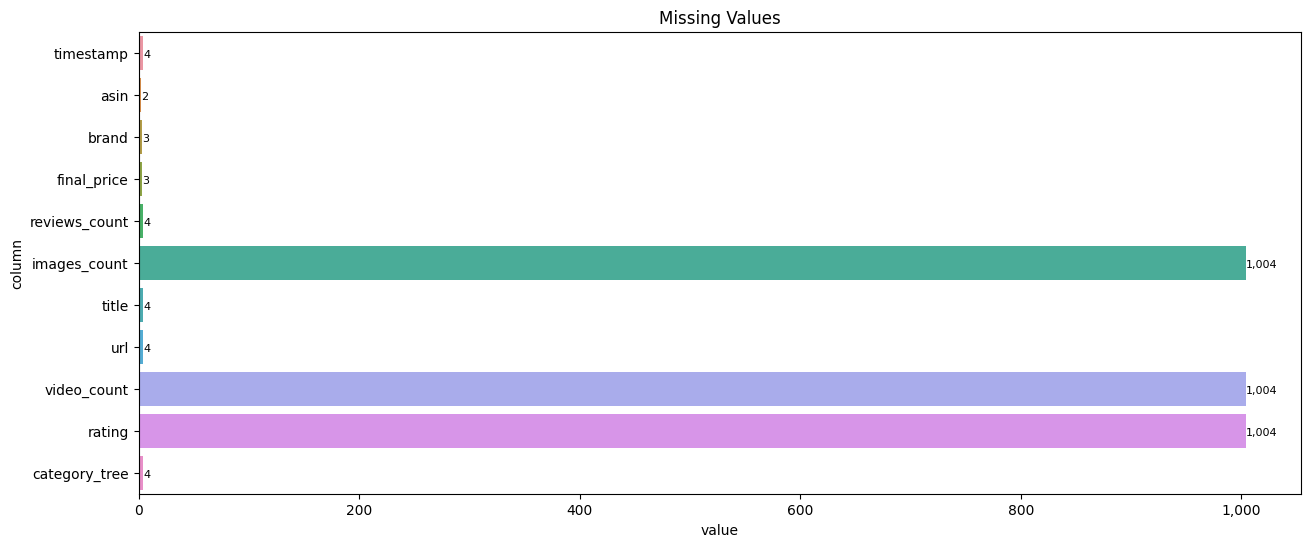

In [23]:
transposed_df = null_counts.toPandas().T.reset_index()

# Rename the columns
transposed_df.columns = ['column', 'value']

# Set the figure size for the chart
plt.figure(figsize=(15, 6))

# Create a horizontal bar chart using Seaborn with the custom figure size
ax = sns.barplot(x='value', y='column', data=transposed_df)
sns.set_palette("dark")

# Set the chart title
plt.title('Missing Values')

for p in ax.patches:
    width = p.get_width()
    value = '{:,.0f}'.format(width)
    x = width + 0.1
    y = p.get_y() + p.get_height() / 2 + 0.1
    ax.annotate(value, (x, y), fontsize=8)
    
# Format y-axis labels with a thousands comma separator
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Display the chart
plt.show()

#### <font color='green'>Clean and transform the final_price column</font>

In [24]:
# Get the first price if there are two prices listed
df = df.withColumn("final_price", split(col("final_price"), " ").getItem(0))

In [25]:
# Drop the rows where the price is missing
df = df.na.drop(subset=["final_price"])

In [26]:
# Double check that there's definitely no missing values in the final_price column
df.filter(col("final_price").isNull()).count()

0

In [27]:
# Remove the $ sign from the final_price column and change the data type from string to double
df = df.withColumn("final_price", regexp_replace(col("final_price"), "[US$,]", "").cast('double'))

In [28]:
df.limit(6).toPandas()

23/09/23 22:47:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: timestamp, asin, brand, final_price, reviews_count, title, url, video_count, categories, item_weight, top_review
 Schema: timestamp, asin, brand, final_price, reviews_count, images_count, title, url, video_count, category_tree, rating
Expected: images_count but found: title
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


,timestamp,asin,brand,final_price,reviews_count,images_count,title,url,video_count,rating,category_tree
0,2022-10-03,B07W5RF3HH,Kensington,29.49,114,NaN,https://www.amazon.com/dp/B07W5RF3HH?language=...,1,NaN,NaN,‎4.8 ounces
1,2023-09-10,B0C5J3P4FP,Jzyliti,9.99,210,NaN,https://www.amazon.com/Electricity-Saving-Hous...,0,NaN,NaN,6.1 ounces
2,2023-09-10,B0BC3Y5LDP,Tamispit,29.99,2087,NaN,https://www.amazon.com/tamispit-Swimming-Water...,0,NaN,NaN,2.39 ounces
3,2023-09-10,B0C8SGDRX5,DYEYOY,29.99,1319,NaN,https://www.amazon.com/Cartridges-Compatible-R...,0,NaN,NaN,6.4 ounces
4,2023-08-22,B08F6T1CJ7,HP,699.00,487,NaN,https://www.amazon.com/HP-DesignJet-Compact-Wi...,0,NaN,NaN,47 pounds
5,2023-09-10,B07Z6CSMKM,GEEKRIA,15.95,60,NaN,https://www.amazon.com/UltraShell-Cancelling-H...,0,NaN,NaN,5.6 ounces


In [29]:
# Check the schema
df.printSchema()

root
 |-- timestamp: date (nullable = true)
 |-- asin: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- final_price: double (nullable = true)
 |-- reviews_count: integer (nullable = true)
 |-- images_count: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- video_count: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- category_tree: string (nullable = true)



#### <font color='green'>Clean the rating column</font>

In [30]:
df = df.na.drop(subset=["rating"])

In [31]:
# Double check that there's definitely no missing values in the rating column
df.filter(col("rating").isNull()).count()

23/09/23 22:47:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: final_price, top_review
 Schema: final_price, rating
Expected: rating but found: top_review
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


0

#### <font color='green'>Get the detailed category from the category_tree column (i.e. the last element from the list, the most granular category description</font>

In [32]:
# Replace the square brackets and the quotation marks with nothing using regex
df = df.withColumn("category_tree", regexp_replace(col("category_tree"), r'[\[\]\"]', ''))

In [33]:
# Creating category array column so we can extract the last element
df = df.withColumn('cat_arr', split(df.category_tree, ','))

In [34]:
# Creating the detailed category column
df = df.withColumn('detailed_category', df.cat_arr[size(df.cat_arr)-1])

In [35]:
pd.options.display.max_colwidth = None

In [36]:
df.select('brand', 'title', 'category_tree', 'detailed_category').limit(5).toPandas()

23/09/23 22:47:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: brand, final_price, url, item_weight, top_review
 Schema: brand, final_price, title, category_tree, rating
Expected: title but found: url
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


,brand,title,category_tree,detailed_category


In [37]:
# Count the distinct values in the detailed_category column
(df.groupBy('detailed_category').count()).count()

23/09/23 22:47:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: final_price, item_weight, top_review
 Schema: final_price, category_tree, rating
Expected: category_tree but found: item_weight
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


0

#### <font color='red'>Which detailed product categories have the most products?</font>

In [52]:
# Group by 'detailed_category' and count the number of rows for each category
grouped_df = df.groupBy("detailed_category").agg(count("*").alias("count"))

# Order by the count in descending order and limit to the top 20 categories
top_30_df = grouped_df.orderBy(col("count").desc()).limit(30)

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting with seaborn
pandas_df = top_30_df.toPandas()

# print(pandas_df)
# Create a horizontal bar chart using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="count", y="detailed_category", data=pandas_df)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Format the data labels with a thousands comma separator and add them to the bars
for index, value in enumerate(pandas_df["count"]):
    ax.text(value, index, f"{value:,.0f}", ha='left', va='center', color='black', fontsize=12)

ax.set_xlabel("Number of Products")
ax.set_ylabel("Detailed Category")
ax.set_title("Top 30 detailed categories with the most products")

plt.tight_layout()
plt.show()

23/09/23 23:12:39 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: final_price, item_weight, top_review
 Schema: final_price, category_tree, rating
Expected: category_tree but found: item_weight
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


ValueError: min() arg is an empty sequence

<Figure size 1200x800 with 0 Axes>

#### <font color='red'>Let's focus our analysis on a specific detailed category</font>

23/09/23 22:47:59 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: brand, final_price, item_weight, top_review
 Schema: brand, final_price, category_tree, rating
Expected: category_tree but found: item_weight
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv
23/09/23 22:47:59 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: brand, final_price, item_weight, top_review
 Schema: brand, final_price, category_tree, rating
Expected: category_tree but found: item_weight
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv
23/09/23 22:47:59 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: brand, final_price, item_weight, top_review
 Schema: brand, final_price, category_tree, rating
Expected: category_tree but found: item_weight
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


ValueError: min() arg is an empty sequence

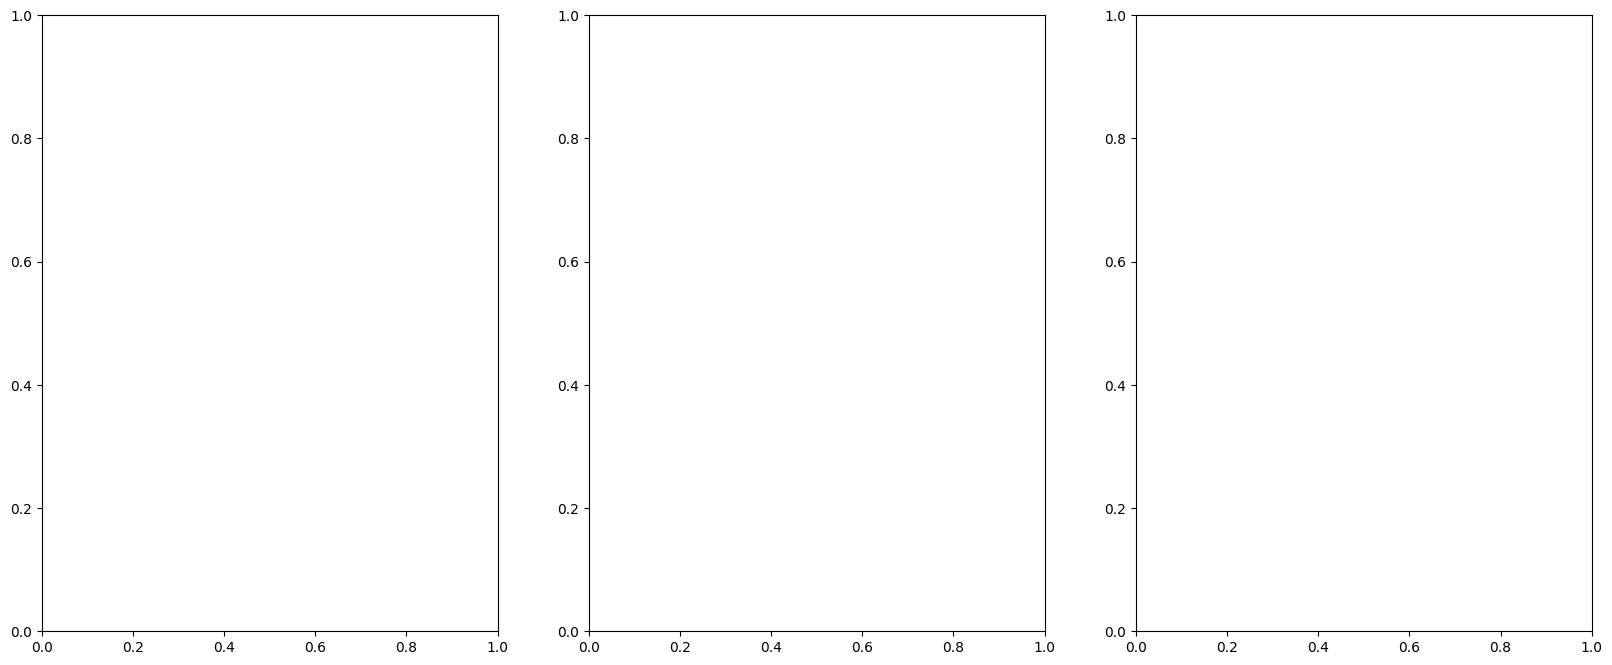

In [39]:
# Define the variables that we want to specify
det_cat = 'Camera Cases'
metric1 = 'rating'
metric2 = 'final_price'

# Filter the DataFrame to keep only rows where 'detailed_category' is 'Cases'
filtered_df = df.filter(col("detailed_category") == det_cat)

# Group by 'brand' and count the number of rows for each brand
grouped_df = filtered_df.groupBy("brand").agg(count("*").alias("brand_count"))

# Calculate the average metric (final_price) for each brand
avg_metric1_df = filtered_df.groupBy("brand").agg(avg(metric1).alias("avg_metric1"))

# Calculate the average rating for each brand
avg_metric2_df = filtered_df.groupBy("brand").agg(avg(metric2).alias("avg_metric2"))

# Join the grouped_df, avg_metric_df, and avg_rating_df DataFrames on 'brand' to combine the information
pandas_df = grouped_df.join(avg_metric1_df, on="brand", how="inner").join(avg_metric2_df, on="brand", how="inner").toPandas()

# Sort the DataFrame in descending order based on brand count
pandas_df = pandas_df.sort_values(by="brand_count", ascending=False)

# Limit the result to the top 20 brands by count
pandas_df = pandas_df.head(20)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Plot the first horizontal bar chart for brand count
sns.barplot(x="brand_count", y="brand", data=pandas_df, palette="viridis", ax=axes[0])

# Format the data labels for brand count
for index, value in enumerate(pandas_df["brand_count"]):
    axes[0].text(value, index, f"{value:,.0f}", ha='left', va='center', color='black', fontsize=12)

# Format the x-axis labels for brand count
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Set labels and title for the first plot
axes[0].set_xlabel("Number of Products")
axes[0].set_ylabel("Brand")
axes[0].set_title("Top 20 Brands with most products in " + det_cat + " category")

# Plot the second horizontal bar chart for average metric (final_price)
sns.barplot(x="avg_metric1", y="brand", data=pandas_df, palette="viridis", ax=axes[1])

# Set a small offset for the data labels
label_offset = 0.1

# Format the data labels for average metric (final_price)
for index, value in enumerate(pandas_df["avg_metric1"]):
    axes[1].text(value + label_offset, index, f"{value:.1f}", ha='left', va='center', color='black', fontsize=12)

# Set labels and title for the second plot
axes[1].set_xlabel("Average " + metric1)
axes[1].set_ylabel("")  # Hide the ylabel for the second plot
axes[1].set_title("Average " + metric1 + " for Top 20 Brands in " + det_cat + " category")

# Plot the third horizontal bar chart for average rating
sns.barplot(x="avg_metric2", y="brand", data=pandas_df, palette="viridis", ax=axes[2])

# Format the data labels for average rating
for index, value in enumerate(pandas_df["avg_metric2"]):
    axes[2].text(value + label_offset, index, f"{value:.1f}", ha='left', va='center', color='black', fontsize=12)

# Set labels and title for the third plot
axes[2].set_xlabel("Average " + metric2)
axes[2].set_ylabel("")  # Hide the ylabel for the third plot
axes[2].set_title("Average " + metric2 + " for Top 20 Brands in " + det_cat + " category")

# Adjust spacing between the subplots
plt.tight_layout()

# Display the plots
plt.show()

#### <font color='red'>Which specific products should we do a deep-dive on?</font>

In [40]:
#brands = ['Pelican','Nanuk'] # expensive
#brands = ['Lowepro','Eylar'] # medium
brands = ['Fintie','Leayjeen'] # cheap

(df.filter(col("brand").isin(brands) & (col("detailed_category") == det_cat))
              .sort(col("rating").desc())
              .limit(30)
              .toPandas())

23/09/23 22:48:12 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: timestamp, asin, brand, final_price, reviews_count, title, url, video_count, categories, item_weight, top_review
 Schema: timestamp, asin, brand, final_price, reviews_count, images_count, title, url, video_count, category_tree, rating
Expected: images_count but found: title
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


,timestamp,asin,brand,final_price,reviews_count,images_count,title,url,video_count,rating,category_tree,cat_arr,detailed_category


#### <font color='red'>How many images and videos should our products have?</font>

In [41]:
#brands = ['Pelican','Nanuk'] # expensive
#brands = ['Lowepro','Eylar'] # medium
brands = ['Fintie','Leayjeen'] # cheap


df_filtered = df.filter(col("brand").isin(brands) & (col("detailed_category") == det_cat))

# Group by 'images_count' and 'video_count' and count the occurrences
grouped_df = filtered_df.groupBy("images_count", "video_count").count()

# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = grouped_df.toPandas()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 10))
heatmap_data = pandas_df.pivot("images_count", "video_count", "count")
sns.heatmap(heatmap_data, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), cbar=True, fmt=",g")

# Customize the plot
plt.xlabel("Video Count")
plt.ylabel("Images Count")
plt.title("How many images and videos should the product have?", fontsize=15)

# Show the plot
plt.show()

23/09/23 22:48:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: final_price, title, categories, item_weight, top_review
 Schema: final_price, images_count, video_count, category_tree, rating
Expected: images_count but found: title
CSV file: file:///Users/hipprofessional/Downloads/Amazon%20products%20dataset.csv


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

<Figure size 1000x1000 with 0 Axes>